Yair Fogel-Dror, The Hebrew University of Jerusalem

Email: yair.fogel-dror@mail.huji.ac.il

The 12th Annual Graduate Conference, The Hebrew University of Jerusalem, 13.12.16

# Political Text as Data Workshop

## Introduction

Some references:
* Boumans, J. W., & Trilling, D. (2015). Taking Stock of the Toolkit. Digital Journalism. doi:10.1080/21670811.2015.1096598
* Grimmer, J., & Stewart, B. M. (2013). Text as Data: The Promise and Pitfalls of Automatic Content Analysis Methods for Political Texts. Political Analysis, 21(3), 267–297. doi:10.1093/pan/mps02
* Schwartz, H. a., & Ungar, L. H. (2015). Data-Driven Content Analysis of Social Media: A Systematic Overview of Automated Methods. The ANNALS of the American Academy of Political and Social Science, 659(1), 78–94. doi:10.1177/0002716215569197

Four Principles of Automated Text Analysis:
* All Quantitative Models of Language Are Wrong — But Some Are Useful
* Quantitative Methods Augment Humans, Not Replace Them
* There Is No Globally Best Method for Automated Text Analysis
* Validate, Validate, Validate

(Grimmer & Stewart, 2013)

<img src="classification of methods.jpg">

(Boumans & Trilling, 2015)

We will go throught one example from each category.

Which is cool, but there are many more methods out there...

<img src="methods overview.jpeg">

<img src="ml_map.png">

(source: http://scikit-learn.org/stable/tutorial/machine_learning_map/)

# Getting the data

In [1]:
import pandas as pd
import os

In [2]:
pd.set_option('display.max_colwidth', 300)

In [3]:
DATA_DIR = r"C:\Users\Owner\OneDrive\Software\Political Text as Data"

In [4]:
FILENAME = "merged.xlsx"
path = os.path.join(DATA_DIR, FILENAME)

In [5]:
df = pd.read_excel(path, encoding='utf-8', index_col=[0], na_values='NA')

In [6]:
df.head()

,site,published_date,hour,url,sentence_index,sentence_text,violent conflict,political conflict,colaboration and resolution
row_id,,,,,,,,,
1008,theglobeandmail,2014-07-30,07:22:00+00:00,http://www.theglobeandmail.com/globe-debate/in-gaza-its-all-about-the-tunnels/article19842081/?cmpid=rss1,31,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",1,1,0
1010,theglobeandmail,2014-07-30,07:22:00+00:00,http://www.theglobeandmail.com/globe-debate/in-gaza-its-all-about-the-tunnels/article19842081/?cmpid=rss1,33,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .,1,1,0
1940,bbc,2014-04-23,13:28:00+00:00,http://www.bbc.co.uk/news/technology-27126234#sa-ns_mchannel=rss&ns_source=PublicRSS20-sa,16,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint .",0,0,0
1941,bbc,2014-04-23,13:28:00+00:00,http://www.bbc.co.uk/news/technology-27126234#sa-ns_mchannel=rss&ns_source=PublicRSS20-sa,17,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''",0,0,0
1942,bbc,2014-04-23,13:28:00+00:00,http://www.bbc.co.uk/news/technology-27126234#sa-ns_mchannel=rss&ns_source=PublicRSS20-sa,18,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers .",0,0,0


In [7]:
df[['sentence_text']].head()

,sentence_text
row_id,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities ."
1010,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .
1940,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint ."
1941,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''"
1942,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers ."


# Clean the text

### Use an existing stop words list

In [8]:
import nltk
from nltk.corpus import stopwords

stoplist = set(stopwords.words('english'))
print(stoplist)

{'up', 'between', 'into', 'can', 'to', 'does', 'here', 'very', 'again', 'this', 'having', 'doing', 'a', 'ours', 'am', 'about', 'an', 'is', 'had', 'at', 'above', 'too', 'have', 'they', 'my', 'because', 'himself', 'it', 't', 'just', 'your', 'how', 'those', 'through', 'other', 'some', 'but', 'with', 'for', 'me', 'has', 'as', 'themselves', 'why', 'any', 'by', 'so', 'such', 'these', 'on', 'not', 'down', 'than', 'whom', 'yours', 'be', 'who', 'what', 'or', 'there', 'most', 'don', 'against', 'we', 'few', 's', 'more', 'herself', 'from', 'during', 'his', 'no', 'were', 'of', 'him', 'you', 'under', 'off', 'nor', 'if', 'yourself', 'being', 'was', 'and', 'been', 'did', 'should', 'their', 'myself', 'now', 'that', 'further', 'while', 'over', 'theirs', 'same', 'all', 'do', 'only', 'before', 'its', 'then', 'once', 'are', 'own', 'ourselves', 'until', 'below', 'itself', 'in', 'each', 'them', 'both', 'where', 'he', 'she', 'hers', 'after', 'yourselves', 'our', 'the', 'will', 'when', 'out', 'her', 'which', '

### Create a stop words list

In [9]:
# This is just an example stop words list. There are better ones out there.
# "the" was deliberatly not included for deom purpose
stoplist = set("""for a of and to in that \\ \ at . / as  `` 
               \'s be have has it he she an -- -RRB- -LRB- was with -rrb- is , i they were its by 
               are his  at from than their been had : '\\' would will -lrb- would on do n\\'t
               ` will which \'\' but we he she it they them this n\'t you or '\'  \' , . 
               - \'d '--""".split())
print(stoplist)

{'of', 'you', '`', '-rrb-', 'to', "'", 'but', 'are', "'s", 'with', '-', 'for', 'has', 'as', 'was', 'and', 'been', 'this', 'their', 'a', 'would', 'in', 'by', '\\', "'--", 'that', '.', 'an', '/', 'is', 'them', 'on', ',', 'than', '-LRB-', '--', "n't", 'at', 'he', 'had', 'be', 'she', '-lrb-', '``', 'have', 'or', "n\\'t", 'they', 'will', 'do', "''", 'we', 'it', ':', 'which', '-RRB-', 'i', 'from', "'\\'", 'his', 'its', "'d", 'were'}


In [12]:
def clean_text(in_text, _stoplist):
    out_text = []
    for word in in_text.lower().split():
        if word not in _stoplist:
            out_text.append(word)
    out_text = ' '.join(out_text)        
    return out_text

In [13]:
df['clean_text'] = df['sentence_text'].apply(clean_text, args = (stoplist,))

In [14]:
df[['sentence_text', 'clean_text']].head()

,sentence_text,clean_text
row_id,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities
1010,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza
1940,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint .",personally ca see effective use case above beyond what already available boarding passes stuff like moving the phone said stuart miles founder gadget review site pocket-lint
1941,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''",reminds me the turtle printers around bbc micro computers all those year ago program off go think more sense target education market
1942,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers .",jason fitzpatrick director the uk centre computing history agreed analysis adding schools actively seeking modern equivalents the valiant turtle bbc buggy help teach children how use raspberry pi computers


# Dictionary (lexicon) analysis

## Create a dictionary manually

In [15]:
# a dictionary is also a Python variable type so we use the lexicon term instead...
lexicon = ['launch', 'shoot', 'kill', 'bomb', 'terror', 'military', 'rocket', 'violence', 'knife', 'attack']

### Number of words from lexicon (version1)

In [16]:
def cal_lexicon_ver1(in_text, _lexicon):
    ###
    # Counts how many terms from the lexicon apperas in the givven text
    ###
    score = 0
    for word in _lexicon:
        if word in in_text:
            score += 1
    return score

In [17]:
df['lexicon ver1'] = df['clean_text'].apply(cal_lexicon_ver1, args=(lexicon,))

In [18]:
df[['lexicon ver1']].head()

,lexicon ver1
row_id,
1008,0
1010,0
1940,0
1941,0
1942,0


In [19]:
interesting_columns = ['sentence_text', 'clean_text', 'lexicon ver1']

In [20]:
df.sort_values(by='lexicon ver1', ascending=False)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1
row_id,,,
2372,"Meanwhile , on Sunday , Israel Defense Forces said it prevented an attack by targeting terrorists involved in rocket launching in Gaza .",meanwhile sunday israel defense forces said prevented attack targeting terrorists involved rocket launching gaza,4
3030,"Palestinians , including attackers , children and protesters have been killed in two weeks of violence .",palestinians including attackers children protesters killed two weeks violence,3
4110,"Palestinian militants bombarded Israel with some 40 rockets and mortars , drawing Israeli airstrikes in retaliation , and at least eight Palestinian militants were killed .",palestinian militants bombarded israel some 40 rockets mortars drawing israeli airstrikes retaliation least eight palestinian militants killed,3
4796,"That , coupled with the frequency of the attacks which have killed eight Israelis this month , including three on Tuesday , has unnerved Israelis who fear the violence could deteriorate into another Palestinian uprising .",coupled the frequency the attacks killed eight israelis month including three tuesday unnerved israelis who fear the violence could deteriorate into another palestinian uprising,3
2689,The military cited 18 Palestinian rockets launched against Israel from Gaza in the past two days .,the military cited 18 palestinian rockets launched against israel gaza the past two days,3


In [21]:
df.sort_values(by='lexicon ver1', ascending=True)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1
row_id,,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities,0
4868,"Led by Mr. Glick and a small band of other activists and right-wing politicians , Jewish visits to the Temple Mount have increased over the past several years , along with protests of the Israeli police 's prohibition of non-Muslim prayer at the site .",led mr. glick small band other activists right-wing politicians jewish visits the temple mount increased over the past several years along protests the israeli police prohibition non-muslim prayer the site,0
4858,"`` Jordanians feel the latest actions taken by Israel are directed against Jordan this time , not only against Palestinians , '' said Jawad Anani , a former Jordanian foreign minister and deputy prime minister .",jordanians feel the latest actions taken israel directed against jordan time not only against palestinians said jawad anani former jordanian foreign minister deputy prime minister,0
4857,"The Jordanian minister , Hayel Daoud , urged the international community to pressure Israel to lift the ban right away , the latest in a series of unusually harsh criticism by Jordanian leaders , including an extremely rare rebuke by King Abdullah himself .",the jordanian minister hayel daoud urged the international community pressure israel lift the ban right away the latest series unusually harsh criticism jordanian leaders including extremely rare rebuke king abdullah himself,0
1429,"There was additional bloodshed in Haifa , where an Israeli Jew stabbed a man he mistakenly thought was Arab outside an IKEA .",there additional bloodshed haifa where israeli jew stabbed man mistakenly thought arab outside ikea,0


Is it good? bad?

### Validation

In [22]:
interesting_columns.append('violent conflict ')

In [23]:
df[df['violent conflict '] == 0][interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict
row_id,,,,
1940,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint .",personally ca see effective use case above beyond what already available boarding passes stuff like moving the phone said stuart miles founder gadget review site pocket-lint,0,0
1941,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''",reminds me the turtle printers around bbc micro computers all those year ago program off go think more sense target education market,0,0
1942,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers .",jason fitzpatrick director the uk centre computing history agreed analysis adding schools actively seeking modern equivalents the valiant turtle bbc buggy help teach children how use raspberry pi computers,0,0
1947,He served as the U.S. ambassador to both Israel and Egypt .,served the u.s. ambassador both israel egypt,0,0
1951,Many Arab and Muslim states have maintained an economic and political boycott against Israel for decades .,many arab muslim states maintained economic political boycott against israel decades,0,0


In [24]:
df[df['violent conflict '] == 1][interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict
row_id,,,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities,0,1
1010,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza,0,1
1949,"-LRB- CNN -RRB- Few states face the kind of complex , sustained security challenges that Israel does .",cnn few states face the kind complex sustained security challenges israel does,0,1
1950,Israel has not enjoyed one day of peace with its neighbors since its independence in 1948 .,israel not enjoyed one day peace neighbors since independence 1948,0,1
1952,"There is an automatic majority against Israel in the United Nations , leading often to perverse outcomes in which Israel 's human rights record is condemned by states whose violations of human rights are far worse .",there automatic majority against israel the united nations leading often perverse outcomes israel human rights record condemned states whose violations human rights far worse,0,1


In [25]:
df['violent conflict '].value_counts()

1    672
0    227
Name: violent conflict , dtype: int64

In [26]:
from sklearn import metrics

In [27]:
def apply_threshold(score, th):
    if score>=th:
        return 1
    else:
        return 0

In [28]:
df['lexicon ver1'].value_counts()

0    604
1    199
2     73
3     22
4      1
Name: lexicon ver1, dtype: int64

In [29]:
df['lexicon ver1 classification'] = df['lexicon ver1'].apply(apply_threshold, args=(2,))

In [30]:
df['lexicon ver1 classification'].value_counts()

0    803
1     96
Name: lexicon ver1 classification, dtype: int64

In [31]:
interesting_columns.append('lexicon ver1 classification')

In [32]:
df.sort_values(by='lexicon ver1 classification', ascending=False)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification
row_id,,,,,
3577,"At a meeting of the security cabinet that finished in the early hours , Prime Minister Benjamin Netanyahu also allowed revocation of residency rights of Palestinians deemed to have committed `` terrorism '' and a step-up in the demolition of homes of peop...",meeting the security cabinet finished the early hours prime minister benjamin netanyahu also allowed revocation residency rights palestinians deemed committed terrorism step-up the demolition homes people who carry out attacks,2,1,1
4862,"Mr. Netanyahu on Thursday condemned the shooting of the Jewish activist , Yehuda Glick , as `` an act of terrorism . ''",mr. netanyahu thursday condemned the shooting the jewish activist yehuda glick act terrorism,2,1,1
2233,"Since the Jewish New Year last month , six Israelis have been killed and dozens wounded in a shooting , a stoning and a series of stabbings .",since the jewish new year last month six israelis killed dozens wounded shooting stoning series stabbings,2,1,1
1123,"At least 10 Palestinians have also been killed , including those accused of carrying out the attacks prior to the synagogue assault .",least 10 palestinians also killed including those accused carrying out the attacks prior the synagogue assault,2,1,1
1122,Five Israelis and a foreign visitor were killed in the Palestinian attacks that preceded Tuesday 's incident .,five israelis foreign visitor killed the palestinian attacks preceded tuesday incident,2,1,1


In [33]:
df.sort_values(by='lexicon ver1 classification', ascending=True)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification
row_id,,,,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities,0,1,0
2379,Khedair 's American cousin was given house arrest by a court in Jerusalem on Sunday after an incident in which his family says he was beaten by Israeli security forces .,khedair american cousin given house arrest court jerusalem sunday after incident family says beaten israeli security forces,0,1,0
2380,Tariq Khdeir was detained at a protest following the death of his cousin .,tariq khdeir detained protest following the death cousin,0,1,0
2383,"I woke up in the hospital , '' Khdeir said as he walked out of court in Jerusalem on Sunday .",woke up the hospital khdeir said walked out court jerusalem sunday,0,1,0
2385,"The teen , who had bruising around his eyes , paid bail and was driven away with his parents to serve his house arrest in the Beit Hanina neighborhood in Jerusalem .",the teen who bruising around eyes paid bail driven away parents serve house arrest the beit hanina neighborhood jerusalem,0,1,0


In [34]:
def eval_accuracy(expected, predicted, show_conf_matrix=True):
    if show_conf_matrix:
        print("confusion matrix: \n {}".format(metrics.confusion_matrix(expected, predicted)))
    print("accuracy: {}".format(metrics.accuracy_score(expected, predicted)))
    print(metrics.classification_report(expected, predicted))

In [35]:
temp_df = df[pd.notnull(df['violent conflict '])]
expected = temp_df['violent conflict ']
predicted =temp_df['lexicon ver1 classification']
eval_accuracy(expected, predicted)

confusion matrix: 
 [[227   0]
 [576  96]]
accuracy: 0.3592880978865406
             precision    recall  f1-score   support

          0       0.28      1.00      0.44       227
          1       1.00      0.14      0.25       672

avg / total       0.82      0.36      0.30       899



<img src="8c3f5b1cef3a52644de5056fd2fafee6.png">

<img src=a87a5d89797001aa6c8d9a7031caf1ad.png>

<img src=91b88600b433b3059101d0295735daf5.png>

<img src=81729df4a5d653e8db5d693151e7deb2.png>

(Source: https://en.wikipedia.org/wiki/Precision_and_recall)

Still - is it good or bad?

The empty model:

In [36]:
df['violent conflict '].sum() / len(df)

0.74749721913236933

### Number of occurences (Version 2)

In [37]:
def cal_lexicon_ver2(in_text, _lexicon):
    ###
    # Counts how many words from the text appear in the lexicon
    ###
    score = 0
    for word in _lexicon:
        score += in_text.count(word)
    return score

In [38]:
df['lexicon ver2'] = df['clean_text'].apply(cal_lexicon_ver2, args=(lexicon,))

In [39]:
interesting_columns.append('lexicon ver2')

In [40]:
df.sort_values(by='lexicon ver2', ascending=False)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification,lexicon ver2
row_id,,,,,,
2372,"Meanwhile , on Sunday , Israel Defense Forces said it prevented an attack by targeting terrorists involved in rocket launching in Gaza .",meanwhile sunday israel defense forces said prevented attack targeting terrorists involved rocket launching gaza,4,1,1,4
543,"The killing of the three teenagers led to the kidnapping and killing of a Palestinian teenager '-- said to be revenge by Israeli extremists '-- violent Palestinian protests , rocket attacks on Israel by Gaza-based militants , and an escalation into a 50-da...","the killing the three teenagers led the kidnapping killing palestinian teenager said revenge israeli extremists violent palestinian protests rocket attacks israel gaza-based militants escalation into 50-day war halted last week left more 2,100 gazans more 70 israelis dead",3,1,1,4
39,"The outbreak of violence followed the kidnappings and killings of three Israeli teenagers in the West Bank last month , as well as the subsequent kidnapping and killing of a Palestinian teenager in an apparent revenge attack , along with Israeli raids agai...",the outbreak violence followed the kidnappings killings three israeli teenagers the west bank last month well the subsequent kidnapping killing palestinian teenager apparent revenge attack along israeli raids against hamas militants infrastructure the west bank,3,1,1,4
4808,"Besides the eight Israelis killed in a string of stabbings , shootings and the stoning of a car , 31 Palestinians also have died - 14 of them identified by Israel as attackers and the rest killed in stone-throwing clashes with Israeli forces .",besides the eight israelis killed string stabbings shootings the stoning car 31 palestinians also died 14 identified israel attackers the rest killed stone-throwing clashes israeli forces,3,1,1,4
4796,"That , coupled with the frequency of the attacks which have killed eight Israelis this month , including three on Tuesday , has unnerved Israelis who fear the violence could deteriorate into another Palestinian uprising .",coupled the frequency the attacks killed eight israelis month including three tuesday unnerved israelis who fear the violence could deteriorate into another palestinian uprising,3,1,1,3


In [41]:
df['lexicon ver2 classification'] = df['lexicon ver2'].apply(apply_threshold, args=(2,))

In [42]:
temp_df = df[pd.notnull(df['violent conflict '])]
expected = temp_df['violent conflict ']
predicted =temp_df['lexicon ver2 classification']
eval_accuracy(expected, predicted)

confusion matrix: 
 [[227   0]
 [564 108]]
accuracy: 0.37263626251390436
             precision    recall  f1-score   support

          0       0.29      1.00      0.45       227
          1       1.00      0.16      0.28       672

avg / total       0.82      0.37      0.32       899



## Expand the dictionary by synonyms

In [43]:
from nltk.corpus import wordnet as wn

In [44]:
def expand_expression(_expression):
    synsets = wn.synsets(_expression)    
    syn_set = set()
    for synset in synsets:
        for lemma in synset.lemma_names():
            syn_set.add(lemma.replace('_', ' '))
    print(syn_set)
    return syn_set

In [45]:
def expand_lexicon(_lexicon):
    expanded_lexicon = []
    for expression in _lexicon:
        print("~~~~~~~~~~~~~~~")
        print(expression)
        expanded_lexicon.append(expression)
        expanded_lexicon += expand_expression(expression)
        print("---------------")
    return expanded_lexicon

In [46]:
lexicon

['launch',
 'shoot',
 'kill',
 'bomb',
 'terror',
 'military',
 'rocket',
 'violence',
 'knife',
 'attack']

In [47]:
expanded = expand_lexicon(lexicon)

~~~~~~~~~~~~~~~
launch
{'launch', 'establish', 'launching', 'found', 'set up', 'plunge', 'set in motion'}
---------------
~~~~~~~~~~~~~~~
shoot
{'dissipate', 'burgeon forth', 'blast', 'sprout', 'frivol away', 'germinate', 'pullulate', 'shoot down', 'hit', 'fool', 'bourgeon', 'inject', 'film', 'fritter away', 'flash', 'fritter', 'scud', 'scoot', 'pip', 'tear', 'photograph', 'shoot', 'spud', 'dart', 'charge', 'dash', 'buck', 'snap', 'fool away', 'take'}
---------------
~~~~~~~~~~~~~~~
kill
{'down', 'vote out', 'vote down', 'defeat', 'stamp out', 'toss off', 'obliterate', 'putting to death', 'pop', 'pour down', 'wipe out', 'drink down', 'belt down', 'kill', 'bolt down', 'shoot down', 'killing'}
---------------
~~~~~~~~~~~~~~~
bomb
{'bombard', 'turkey', 'fail', 'bomb', 'flunk', 'flush it', 'bomb calorimeter', 'dud'}
---------------
~~~~~~~~~~~~~~~
terror
{'terror', 'scourge', 'little terror', 'threat', 'brat', 'panic', 'holy terror', 'affright'}
---------------
~~~~~~~~~~~~~~~
military
{'m

In [48]:
expanded

['launch',
 'launch',
 'establish',
 'launching',
 'found',
 'set up',
 'plunge',
 'set in motion',
 'shoot',
 'dissipate',
 'burgeon forth',
 'blast',
 'sprout',
 'frivol away',
 'germinate',
 'pullulate',
 'shoot down',
 'hit',
 'fool',
 'bourgeon',
 'inject',
 'film',
 'fritter away',
 'flash',
 'fritter',
 'scud',
 'scoot',
 'pip',
 'tear',
 'photograph',
 'shoot',
 'spud',
 'dart',
 'charge',
 'dash',
 'buck',
 'snap',
 'fool away',
 'take',
 'kill',
 'down',
 'vote out',
 'vote down',
 'defeat',
 'stamp out',
 'toss off',
 'obliterate',
 'putting to death',
 'pop',
 'pour down',
 'wipe out',
 'drink down',
 'belt down',
 'kill',
 'bolt down',
 'shoot down',
 'killing',
 'bomb',
 'bombard',
 'turkey',
 'fail',
 'bomb',
 'flunk',
 'flush it',
 'bomb calorimeter',
 'dud',
 'terror',
 'terror',
 'scourge',
 'little terror',
 'threat',
 'brat',
 'panic',
 'holy terror',
 'affright',
 'military',
 'military',
 'armed services',
 'war machine',
 'armed forces',
 'military machine',
 'ro

In [49]:
expanded = list(set(expanded))

### Lemmatizing

In [50]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()           

def lemm_text(_clean_text):
    out_text = []
    for word in _clean_text.split():        
        lm = lmtzr.lemmatize(word)
        if len(lm) > 1:
            out_text.append(lm)
    out_text = ' '.join(out_text)        
    return out_text

In [51]:
# An example
lemm_text('apples capabilities')

'apple capability'

In [52]:
df['lemm_text'] = df['clean_text'].apply(lemm_text)

In [53]:
interesting_columns.append('lemm_text')

In [54]:
df[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification,lexicon ver2,lemm_text
row_id,,,,,,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities,0,1,0,0,yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnel the only alternative the effective degradation hamas capability
1010,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza,0,1,0,0,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza
1940,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint .",personally ca see effective use case above beyond what already available boarding passes stuff like moving the phone said stuart miles founder gadget review site pocket-lint,0,0,0,0,personally ca see effective use case above beyond what already available boarding pass stuff like moving the phone said stuart mile founder gadget review site pocket-lint
1941,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''",reminds me the turtle printers around bbc micro computers all those year ago program off go think more sense target education market,0,0,0,0,reminds me the turtle printer around bbc micro computer all those year ago program off go think more sense target education market
1942,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers .",jason fitzpatrick director the uk centre computing history agreed analysis adding schools actively seeking modern equivalents the valiant turtle bbc buggy help teach children how use raspberry pi computers,0,0,0,0,jason fitzpatrick director the uk centre computing history agreed analysis adding school actively seeking modern equivalent the valiant turtle bbc buggy help teach child how use raspberry pi computer


In [55]:
df['expanded lexicon'] = df['lemm_text'].apply(cal_lexicon_ver2, args=(expanded,))

In [56]:
interesting_columns.append('expanded lexicon')

In [57]:
df.sort_values(by='expanded lexicon', ascending=False)[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification,lexicon ver2,lemm_text,expanded lexicon
row_id,,,,,,,,
543,"The killing of the three teenagers led to the kidnapping and killing of a Palestinian teenager '-- said to be revenge by Israeli extremists '-- violent Palestinian protests , rocket attacks on Israel by Gaza-based militants , and an escalation into a 50-da...","the killing the three teenagers led the kidnapping killing palestinian teenager said revenge israeli extremists violent palestinian protests rocket attacks israel gaza-based militants escalation into 50-day war halted last week left more 2,100 gazans more 70 israelis dead",3,1,1,4,"the killing the three teenager led the kidnapping killing palestinian teenager said revenge israeli extremist violent palestinian protest rocket attack israel gaza-based militant escalation into 50-day war halted last week left more 2,100 gazans more 70 israeli dead",6
2372,"Meanwhile , on Sunday , Israel Defense Forces said it prevented an attack by targeting terrorists involved in rocket launching in Gaza .",meanwhile sunday israel defense forces said prevented attack targeting terrorists involved rocket launching gaza,4,1,1,4,meanwhile sunday israel defense force said prevented attack targeting terrorist involved rocket launching gaza,6
39,"The outbreak of violence followed the kidnappings and killings of three Israeli teenagers in the West Bank last month , as well as the subsequent kidnapping and killing of a Palestinian teenager in an apparent revenge attack , along with Israeli raids agai...",the outbreak violence followed the kidnappings killings three israeli teenagers the west bank last month well the subsequent kidnapping killing palestinian teenager apparent revenge attack along israeli raids against hamas militants infrastructure the west bank,3,1,1,4,the outbreak violence followed the kidnapping killing three israeli teenager the west bank last month well the subsequent kidnapping killing palestinian teenager apparent revenge attack along israeli raid against hamas militant infrastructure the west bank,6
4808,"Besides the eight Israelis killed in a string of stabbings , shootings and the stoning of a car , 31 Palestinians also have died - 14 of them identified by Israel as attackers and the rest killed in stone-throwing clashes with Israeli forces .",besides the eight israelis killed string stabbings shootings the stoning car 31 palestinians also died 14 identified israel attackers the rest killed stone-throwing clashes israeli forces,3,1,1,4,besides the eight israeli killed string stabbings shooting the stoning car 31 palestinian also died 14 identified israel attacker the rest killed stone-throwing clash israeli force,6
2594,"Israel launched the Gaza operation in early July , following a crackdown by Israeli forces in the West Bank , where troops arrested scores of Hamas members , in response to the kidnapping and killings of three teenage Israelis in June by Hamas operatives .",israel launched the gaza operation early july following crackdown israeli forces the west bank where troops arrested scores hamas members response the kidnapping killings three teenage israelis june hamas operatives,2,1,1,2,israel launched the gaza operation early july following crackdown israeli force the west bank where troop arrested score hamas member response the kidnapping killing three teenage israeli june hamas operative,5


In [58]:
df['expanded lexicon classification'] = df['expanded lexicon'].apply(apply_threshold, args=(2,))

In [59]:
temp_df = df[pd.notnull(df['violent conflict '])]
expected = temp_df['violent conflict ']
predicted =temp_df['expanded lexicon classification']
eval_accuracy(expected, predicted)

confusion matrix: 
 [[218   9]
 [446 226]]
accuracy: 0.4938820912124583
             precision    recall  f1-score   support

          0       0.33      0.96      0.49       227
          1       0.96      0.34      0.50       672

avg / total       0.80      0.49      0.50       899



Is this better?

# Learn the weights

In [60]:
temp_df[interesting_columns].head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification,lexicon ver2,lemm_text,expanded lexicon
row_id,,,,,,,,
1008,"Yet , barring a comprehensive two-state peace agreement or an Israeli reoccupation of Gaza , both of which are off the table , it seems the destruction of the tunnels was the only alternative for the effective degradation of Hamas 's capabilities .",yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities,0,1,0,0,yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnel the only alternative the effective degradation hamas capability,0
1010,Mr. Netanyahu has also been criticized by those who say his preoccupation with Iran has diverted his focus from the growing threat in Gaza .,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza,0,1,0,0,mr. netanyahu also criticized those who say preoccupation iran diverted focus the growing threat gaza,1
1940,"`` I personally ca n't see an effective use case that you would have above and beyond what is already available - boarding passes and stuff like that are moving to the phone , '' said Stuart Miles , founder of gadget review site Pocket-lint .",personally ca see effective use case above beyond what already available boarding passes stuff like moving the phone said stuart miles founder gadget review site pocket-lint,0,0,0,0,personally ca see effective use case above beyond what already available boarding pass stuff like moving the phone said stuart mile founder gadget review site pocket-lint,1
1941,"`` It reminds me of the turtle printers that were around for BBC Micro computers all those year ago , which you would program and off they 'd go - and I think it would have more sense to target it at an education market . ''",reminds me the turtle printers around bbc micro computers all those year ago program off go think more sense target education market,0,0,0,0,reminds me the turtle printer around bbc micro computer all those year ago program off go think more sense target education market,1
1942,"Jason Fitzpatrick , director of the UK 's Centre for Computing History , agreed with this analysis adding that schools were actively seeking modern equivalents to the Valiant Turtle and BBC Buggy to help them teach children how to use Raspberry Pi computers .",jason fitzpatrick director the uk centre computing history agreed analysis adding schools actively seeking modern equivalents the valiant turtle bbc buggy help teach children how use raspberry pi computers,0,0,0,0,jason fitzpatrick director the uk centre computing history agreed analysis adding school actively seeking modern equivalent the valiant turtle bbc buggy help teach child how use raspberry pi computer,0


In [61]:
def add_columns_by_lexicon(df, collumn, _lexicon):
    for expression in _lexicon:
            df[expression] = df[collumn].apply(str.count, args = (expression,))

In [62]:
add_columns_by_lexicon(temp_df, 'lemm_text', expanded)

In [63]:
temp_df.columns

Index(['site', 'published_date', 'hour', 'url', 'sentence_index',
       'sentence_text', 'violent conflict ', 'political conflict',
       'colaboration and resolution', 'clean_text',
       ...
       'fail', 'pop', 'furiousness', 'bomb calorimeter', 'military machine',
       'armed services', 'set in motion', 'garden rocket', 'lash out',
       'charge'],
      dtype='object', length=130)

In [64]:
temp_df[interesting_columns + ['fire']].sort_values(by='fire', ascending=False).head()

,sentence_text,clean_text,lexicon ver1,violent conflict,lexicon ver1 classification,lexicon ver2,lemm_text,expanded lexicon,fire
row_id,,,,,,,,,
4103,"Fire services spokesman Asaf Abras said fire investigators , working with Israeli police and the Shin Bet security service , believe the fire almost certainly was an accident .",fire services spokesman asaf abras said fire investigators working israeli police the shin bet security service believe the fire almost certainly accident,0,1,0,0,fire service spokesman asaf abras said fire investigator working israeli police the shin bet security service believe the fire almost certainly accident,3,3
4973,"By late Sunday afternoon , militants had fired more than 15 rockets and mortars into Israel , the military said .",late sunday afternoon militants fired more 15 rockets mortars into israel the military said,2,1,1,2,late sunday afternoon militant fired more 15 rocket mortar into israel the military said,3,1
3070,Angry protests continued along the Gaza border and police fired tear gas and stun grenades at crowds in clashes following a funeral in Bethlehem .,angry protests continued along the gaza border police fired tear gas stun grenades crowds clashes following funeral bethlehem,0,1,0,0,angry protest continued along the gaza border police fired tear gas stun grenade crowd clash following funeral bethlehem,2,1
771,"In that time , 40 Palestinians were killed by Israeli fire , including 19 labeled by Israel as attackers , and the rest in clashes with Israeli troops .",time 40 palestinians killed israeli fire including 19 labeled israel attackers the rest clashes israeli troops,2,1,1,2,time 40 palestinian killed israeli fire including 19 labeled israel attacker the rest clash israeli troop,3,1
1768,Police say warning shots were fired first before the officers felt their lives were threatened and aimed directly at him .,police say warning shots fired first before the officers felt lives threatened aimed directly him,0,1,0,0,police say warning shot fired first before the officer felt life threatened aimed directly him,2,1


In [65]:
temp_df.describe()

,sentence_index,violent conflict,political conflict,colaboration and resolution,lexicon ver1,lexicon ver1 classification,lexicon ver2,lexicon ver2 classification,expanded lexicon,expanded lexicon classification,...,fail,pop,furiousness,bomb calorimeter,military machine,armed services,set in motion,garden rocket,lash out,charge
count,899.00000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,...,899.000000,899.000000,899,899,899,899,899,899,899,899.000000
mean,17.57842,0.747497,0.351502,0.200222,0.461624,0.106785,0.482759,0.120133,0.909900,0.261402,...,0.004449,0.004449,0,0,0,0,0,0,0,0.003337
std,15.23203,0.434690,0.477705,0.400390,0.756137,0.309012,0.798441,0.325299,1.157767,0.439643,...,0.066592,0.066592,0,0,0,0,0,0,0,0.057703
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0.000000
25%,6.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0.000000
50%,13.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0.000000
75%,25.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0.000000
max,79.00000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,1.000000,6.000000,1.000000,...,1.000000,1.000000,0,0,0,0,0,0,0,1.000000


In [66]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

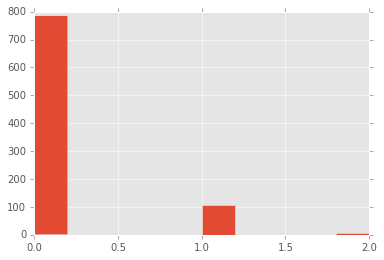

In [67]:
temp_df['kill'].hist()

In [68]:
y = temp_df['violent conflict ']

In [69]:
temp_df[expanded + ['violent conflict ']].head()

,dissipate,little terror,burgeon forth,onslaught,pullulate,holy terror,Eruca sativa,shoot down,fool,bourgeon,...,pop,furiousness,bomb calorimeter,military machine,armed services,set in motion,garden rocket,lash out,charge,violent conflict
row_id,,,,,,,,,,,,,,,,,,,,,
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x = temp_df[expanded]

### A word about over-fitting

In [71]:
from sklearn.cross_validation import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Supervized learning algorithm

## Train a logistic regression classifier

In [73]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

In [74]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [75]:
expected = y_test
predicted = logreg.predict(x_test)
eval_accuracy(expected, predicted)

confusion matrix: 
 [[  0  65]
 [  1 204]]
accuracy: 0.7555555555555555
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        65
          1       0.76      1.00      0.86       205

avg / total       0.58      0.76      0.65       270



(Note the smaller N...)

In [76]:
coefs = pd.DataFrame(list(zip(expanded, logreg.coef_[0])), columns=['feature','coef'])

In [77]:
coefs.sort_values(by='coef', ascending=False)[:10]

,feature,coef
34,attack,2.185506
90,kill,2.172370
53,force,1.397633
14,violence,1.327584
57,military,1.258626
67,terror,1.232616
29,found,1.128329
69,stab,0.976150
81,threat,0.853076
55,shoot,0.771252


In [78]:
coefs.sort_values(by='coef', ascending=True)[:10]

,feature,coef
20,approach,-0.824860
13,brat,-0.495175
66,plunge,-0.495175
50,establish,-0.459280
31,take,-0.331687
38,launch,-0.307826
104,pop,-0.303786
61,attempt,-0.090020
77,defeat,0.000000
76,stamp out,0.000000


# Naive Bayes for one label

In Naive-Bayes we assume all words are conditionally independent. So every word (feature) is treated independently. This is a nice example for "All Quantitative Models of Language Are Wrong — But Some Are Useful"... (usually is preffered where the data-set is not very large Ng & Jordan, 2001).

## Using the expanded lexicon

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
nb_clf = MultinomialNB()

In [81]:
x_train.head()

,dissipate,little terror,burgeon forth,onslaught,pullulate,holy terror,Eruca sativa,shoot down,fool,bourgeon,...,fail,pop,furiousness,bomb calorimeter,military machine,armed services,set in motion,garden rocket,lash out,charge
row_id,,,,,,,,,,,,,,,,,,,,,
2528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3580,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y_train.head()

row_id
2528    1
2449    1
3580    1
5157    0
4775    1
Name: violent conflict , dtype: int64

In [83]:
nb_clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
expected = y_test
predicted = nb_clf.predict(x_test)
eval_accuracy(expected, predicted)

confusion matrix: 
 [[  2  63]
 [  2 203]]
accuracy: 0.7592592592592593
             precision    recall  f1-score   support

          0       0.50      0.03      0.06        65
          1       0.76      0.99      0.86       205

avg / total       0.70      0.76      0.67       270



## Using all words in the corpus

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
vectorizer = CountVectorizer()

In [87]:
data = temp_df['lemm_text'].values.astype(str)

In [88]:
x = vectorizer.fit_transform(data)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [90]:
nb_clf_all = MultinomialNB()
nb_clf_all.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
expected = y_test
predicted = nb_clf_all.predict(x_test)
eval_accuracy(expected, predicted)

confusion matrix: 
 [[ 43  22]
 [  7 198]]
accuracy: 0.8925925925925926
             precision    recall  f1-score   support

          0       0.86      0.66      0.75        65
          1       0.90      0.97      0.93       205

avg / total       0.89      0.89      0.89       270



Even better :)

In [92]:
coefs = pd.DataFrame(list(zip(vectorizer.get_feature_names(), nb_clf_all.coef_[0])), columns=['feature','coef'])

In [93]:
coefs.sort_values(by='coef', ascending=False)[:10]

,feature,coef
3360,the,-2.790850
1814,israeli,-4.051982
2401,palestinian,-4.285358
1813,israel,-4.508502
2901,said,-4.567342
1836,jerusalem,-4.749664
2503,police,-4.875433
352,attack,-5.307010
3641,west,-5.479852
1890,killed,-5.498901


In [94]:
coefs.sort_values(by='coef', ascending=True)[:10]

,feature,coef
3735,zuhri,-9.450144
2649,qatar,-9.450144
2651,quantitative,-9.450144
1238,evidence,-9.450144
1237,everywhere,-9.450144
1236,everything,-9.450144
1235,everyone,-9.450144
2652,quarter,-9.450144
2653,quds,-9.450144
2654,quell,-9.450144


### We could try it with logistic regression as well

In [95]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [96]:
expected = y_test
predicted = logreg.predict(x_test)
eval_accuracy(expected, predicted)

confusion matrix: 
 [[ 41  24]
 [  8 197]]
accuracy: 0.8814814814814815
             precision    recall  f1-score   support

          0       0.84      0.63      0.72        65
          1       0.89      0.96      0.92       205

avg / total       0.88      0.88      0.88       270



In [97]:
coefs = pd.DataFrame(list(zip(vectorizer.get_feature_names(), logreg.coef_[0])), columns=['feature','coef'])

In [98]:
coefs.sort_values(by='coef', ascending=False)[:10]

,feature,coef
2503,police,1.545804
352,attack,1.223852
1800,iran,1.070403
2295,nuclear,1.034379
2259,netanyahu,0.956599
669,city,0.885171
2901,said,0.841543
2401,palestinian,0.809635
2949,security,0.773356
922,deal,0.767434


In [99]:
coefs.sort_values(by='coef', ascending=True)[:10]

,feature,coef
1452,gas,-1.241548
863,cricket,-1.053862
594,capital,-0.940487
1873,kerry,-0.863295
273,app,-0.791013
1124,east,-0.770148
729,company,-0.726126
3088,so,-0.714778
2070,market,-0.661715
248,angered,-0.661195


## KNN for multi-label

Assuming we have multiple labels, which are not mutually exclusive

In [100]:
target_names = ['violent conflict ', 'political conflict', 'colaboration and resolution']

In [101]:
target_classes = temp_df[target_names].values.astype(int).tolist()

In [102]:
target_classes[:10]

[[1, 1, 0],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 1, 0]]

In [103]:
import numpy as np

In [104]:
y = np.array(target_classes)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [106]:
temp_df[target_names].apply(pd.value_counts).fillna(0)

,violent conflict,political conflict,colaboration and resolution
0,227,583,719
1,672,316,180


In [107]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [108]:
nbrs = KNeighborsClassifier()

In [109]:
nbrs_clf = OneVsRestClassifier(nbrs)

In [110]:
nbrs_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          n_jobs=1)

In [111]:
expected = y_test
predicted = nbrs_clf.predict(x_test)
eval_accuracy(expected, predicted, show_conf_matrix=False)

accuracy: 0.4777777777777778
             precision    recall  f1-score   support

          0       0.85      0.78      0.81       205
          1       0.71      0.29      0.41        93
          2       1.00      0.10      0.18        60

avg / total       0.84      0.54      0.60       358



In [112]:
sample_text = """Iran 's continued support for terrorist groups and march towards a nuclear weapon could lead
                 other nations in the region to seek a nuclear weapon"""
clean_sample_text = clean_text(sample_text, stoplist)
p = nbrs_clf.predict(vectorizer.transform([clean_sample_text]))

In [113]:
p.tolist()[0]

[1, 0, 1]

In [114]:
pd.DataFrame(p, columns=target_names)

,violent conflict,political conflict,colaboration and resolution
0,1,0,1


# Working with n-grams

# A quick example

In [115]:
example_sentence = temp_df['clean_text'].iloc[0]
print(example_sentence)

yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off the table seems the destruction the tunnels the only alternative the effective degradation hamas capabilities


In [116]:
analyzer = vectorizer.build_analyzer()

In [117]:
analyzer(example_sentence)

['yet',
 'barring',
 'comprehensive',
 'two',
 'state',
 'peace',
 'agreement',
 'israeli',
 'reoccupation',
 'gaza',
 'both',
 'off',
 'the',
 'table',
 'seems',
 'the',
 'destruction',
 'the',
 'tunnels',
 'the',
 'only',
 'alternative',
 'the',
 'effective',
 'degradation',
 'hamas',
 'capabilities']

In [118]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))

In [119]:
bigram_analyzer = bigram_vectorizer.build_analyzer()

In [120]:
bigram_analyzer(example_sentence)

['yet',
 'barring',
 'comprehensive',
 'two',
 'state',
 'peace',
 'agreement',
 'israeli',
 'reoccupation',
 'gaza',
 'both',
 'off',
 'the',
 'table',
 'seems',
 'the',
 'destruction',
 'the',
 'tunnels',
 'the',
 'only',
 'alternative',
 'the',
 'effective',
 'degradation',
 'hamas',
 'capabilities',
 'yet barring',
 'barring comprehensive',
 'comprehensive two',
 'two state',
 'state peace',
 'peace agreement',
 'agreement israeli',
 'israeli reoccupation',
 'reoccupation gaza',
 'gaza both',
 'both off',
 'off the',
 'the table',
 'table seems',
 'seems the',
 'the destruction',
 'destruction the',
 'the tunnels',
 'tunnels the',
 'the only',
 'only alternative',
 'alternative the',
 'the effective',
 'effective degradation',
 'degradation hamas',
 'hamas capabilities']

In [121]:
x = bigram_vectorizer.fit_transform(data)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [123]:
nbrs_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          n_jobs=1)

In [124]:
expected = y_test
predicted = nbrs_clf.predict(x_test)
eval_accuracy(expected, predicted, show_conf_matrix=False)

accuracy: 0.44074074074074077
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       205
          1       0.70      0.23      0.34        93
          2       1.00      0.02      0.03        60

avg / total       0.80      0.53      0.55       358



# Working with tf-idf weights

In [125]:
add_columns_by_lexicon(temp_df, 'lemm_text', ['said'])

In [126]:
temp_df[(temp_df[ 'violent conflict '] == 1) & (temp_df['said'] == 1)][['sentence_text']].head()

,sentence_text
row_id,
1976,He brought no new ideas but instead said only that it was important to negotiate a `` better deal '' '-- as though U.S. negotiators were intent upon negotiating a bad deal .
2288,Secretary of State John Kerry said on Friday it would be a huge mistake if Israel decided to take unilateral military action against Iran over its nuclear program in the future .
2290,"`` That 'd be an enormous mistake , a huge mistake with grave consequences for Israel and for the region , and I do n't think it 's necessary , '' Kerry said ."
2294,"`` We would lose Europe and China and Russia with respect to whatever military action we might have to take because we will have turned our backs on a very legitimate program that allows us to put their program to the test over these next years , '' ..."
2446,"`` As soon as this particular debate is over , my hope is that the Israeli government will immediately want to rejoin conversations that we started long before about how we can continue to improve and enhance Israel 's security in a very troubled neighbor..."


In [127]:
temp_df[temp_df['violent conflict '] == 1][['said','fire','kill']].apply(pd.value_counts).fillna(0)

,said,fire,kill
0,486,645,558
1,181,26,108
2,5,0,6
3,0,1,0


In [128]:
temp_df[temp_df['violent conflict '] == 0][['said','fire','kill']].apply(pd.value_counts).fillna(0)

,said,fire,kill
0,207,226,227
1,20,1,0


In [129]:
add_columns_by_lexicon(temp_df, 'lemm_text', ['the'])

In [130]:
temp_df[temp_df['violent conflict '] == 1][['the', 'said','fire','kill']].apply(pd.value_counts).fillna(0)

,the,said,fire,kill
0,99,486,645,558
1,194,181,26,108
2,183,5,0,6
3,111,0,1,0
4,48,0,0,0
5,25,0,0,0
6,6,0,0,0
7,5,0,0,0
10,1,0,0,0


In [131]:
temp_df[temp_df['violent conflict '] == 0][['the', 'said','fire','kill']].apply(pd.value_counts).fillna(0)

,the,said,fire,kill
0,28,207,226,227
1,50,20,1,0
2,68,0,0,0
3,38,0,0,0
4,20,0,0,0
5,12,0,0,0
6,4,0,0,0
7,5,0,0,0
8,1,0,0,0
9,1,0,0,0


In [132]:
temp_df[['the', 'said','fire','kill']].apply(pd.value_counts).fillna(0)

,the,said,fire,kill
0,127,693,871,785
1,244,201,27,108
2,251,5,0,6
3,149,0,1,0
4,68,0,0,0
5,37,0,0,0
6,10,0,0,0
7,10,0,0,0
8,1,0,0,0
9,1,0,0,0


In [133]:
from sklearn.feature_extraction.text import TfidfTransformer

In [134]:
tfidf_transformer = TfidfTransformer()

In [135]:
x_tfidf = tfidf_transformer.fit_transform(x)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.3, random_state=0)

In [137]:
nbrs_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          n_jobs=1)

In [138]:
expected = y_test
predicted = nbrs_clf.predict(x_test)
eval_accuracy(expected, predicted, show_conf_matrix=False)

accuracy: 0.6518518518518519
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       205
          1       0.68      0.70      0.69        93
          2       0.86      0.63      0.73        60

avg / total       0.84      0.84      0.83       358



# Unsupervized learning algorithm - probablistic topic modeling

In [139]:
from gensim import corpora, models, utils
from collections import defaultdict

In [140]:
def prepare_texts(texts, th):
    frequency = defaultdict(int)
    for text in texts:
        for token in text.split():
            frequency[token.lower()] += 1

    texts = [[token.lower() for token in text.split() if frequency[token] > th]
              for text in texts]
    return texts

In [141]:
temp_df['clean_text'] = temp_df['clean_text'].apply(clean_text, args = (['the'],))

In [142]:
texts = temp_df['clean_text']

In [143]:
texts.iloc[0]

'yet barring comprehensive two-state peace agreement israeli reoccupation gaza both off table seems destruction tunnels only alternative effective degradation hamas capabilities'

In [144]:
texts = prepare_texts(temp_df['clean_text'], 1)

In [145]:
texts[0]

['yet',
 'peace',
 'agreement',
 'israeli',
 'gaza',
 'both',
 'off',
 'seems',
 'destruction',
 'only',
 'alternative',
 'effective',
 'hamas',
 'capabilities']

In [146]:
dictionary = corpora.Dictionary(texts)

In [147]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [148]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=20, passes=50, iterations=100, chunksize=300)

In [149]:
def get_topics_df(_lda):
    d = {}
    for i in range(_lda.num_topics):
        d[i] = lda.show_topic(i, 50)
        
    topics = pd.DataFrame(d)
    topics = topics.applymap(str)
   
    return topics

In [150]:
topics_df = get_topics_df(lda)

In [151]:
topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(0.045967801854822923, 'including')","(0.053654646932504366, 'israeli')","(0.034579578077319435, 'leaders')","(0.043532210026787456, 'men')","(0.058706927716369858, 'abu')","(0.014972491225482016, 'added')","(0.036465326602678559, 'israel')","(0.080993221724327838, 'jerusalem')","(0.066248525056033528, 'iran')","(0.032089351360702068, 'jews')","(0.046892531276641135, 'thursday')","(0.057217655977646852, 'wounded')","(0.12820138995879307, 'police')","(0.044872638450272423, 'israeli')","(0.052130035412003596, 'jerusalem')","(0.05103371752851045, 'palestinian')","(0.069029203956334814, 'israeli')","(0.074705010303216454, 'attacks')","(0.04006357413245952, 'israel')","(0.073429586576728087, 'gas')"
1,"(0.038848681969048636, 'israel')","(0.044503674193053441, 'palestinian')","(0.030250416620974618, 'recent')","(0.040759081781347101, 'palestinian')","(0.041573469698424223, 'hamas')","(0.014887145698432422, 'all')","(0.025205234348621396, 'mount')","(0.043778332395481262, 'east')","(0.04387407859269106, 'nuclear')","(0.025383774151741288, 'mosque')","(0.029134511149659429, 'shooting')","(0.036976739279015805, 'incident')","(0.052360955019387173, 'said')","(0.030618947264391752, 'where')","(0.047323620032921947, 'palestinian')","(0.027712198371292469, 'city')","(0.056454544238640325, 'killed')","(0.061144205573464838, 'man')","(0.036498392434032634, 'gaza')","(0.041493677669343976, 'israel')"
2,"(0.034186062600601516, 'israeli')","(0.035565800533347083, 'minister')","(0.023669827724987096, 'force')","(0.027776741175225363, 'authority')","(0.037170303423784724, 'group')","(0.013934742657708846, 'down')","(0.024398880132250736, 'site')","(0.03598821770723671, 'israeli')","(0.034906407248769943, 'agreement')","(0.025226422392067762, 'compound')","(0.025899001631701744, 'international')","(0.029366159619687745, 'five')","(0.033611417706593545, 'jewish')","(0.028793636982168615, 'there')","(0.04161404368816278, 'palestinians')","(0.024553318616978469, 'israel')","(0.051197689920546088, 'who')","(0.048354654636358213, 'out')","(0.032094309989423322, 'fire')","(0.031423847260495505, 'egypt')"
3,"(0.033505040167232089, 'wednesday')","(0.035284638750501904, 'violence')","(0.023489935033829228, 'up')","(0.022755973117191214, 'abbas')","(0.026398702364691339, 'death')","(0.013714480362769841, 'foreign')","(0.023438518452390065, 'temple')","(0.03028281330199074, 'west')","(0.028756218394502479, 'family')","(0.024653495263351706, 'muslims')","(0.025829925286231337, 'israel')","(0.0279803376242953, 'another')","(0.024120987167573372, 'city')","(0.022076695750170128, 'along')","(0.041349114998574639, 'israelis')","(0.023895428210490465, 'hebron')","(0.033485148208439675, 'shot')","(0.031153231061726981, 'weeks')","(0.02801174459631189, 'said')","(0.022162915531189289, 'islamist')"
4,"(0.030248667558876025, 'security')","(0.035189106744281877, 'attack')","(0.01684996785167367, 'nuclear')","(0.020719628244015305, 'obama')","(0.026270201717985012, 'jerusalem')","(0.013569355770928583, 'further')","(0.021076437173834322, 'jewish')","(0.028808119095753953, 'bank')","(0.026796461885192722, 'deal')","(0.021786860801490313, 'said')","(0.023331639941935687, 'called')","(0.024817308914075131, 'call')","(0.0194493263729342, 'bus')","(0.021757131738860677, 'condemned')","(0.035693917477388731, 'two')","(0.021630735717862011, 'carried')","(0.028332949137696274, 'died')","(0.02614977973687466, 'israel')","(0.024930404241492874, 'according')","(0.018555531451028319, 'much')"
5,"(0.02908795968316371, 'jordan')","(0.034026289623360677, 'netanyahu')","(0.016313762151331391, 'stop')","(0.01900608788334273, 'israel')","(0.024082620802550057, 'israel')","(0.01345261578577639, 'market')","(0.021063220277550782, 'said')","(0.019488571097480201, 'security')","(0.021459480946171696, 'news')","(0.021757393007045104, 'holy')","(0.0221367750281674, 'past')","(0.018629167544797383, 'there')","(0.017774560905756191, 'israel')

In [153]:
temp_df['sentence_text'].iloc[0]

"Yet ,  barring  a  comprehensive  two-state  peace  agreement  or  an  Israeli  reoccupation  of  Gaza ,  both  of  which  are  off  the  table ,  it  seems  the  destruction  of  the  tunnels  was  the  only  alternative  for  the  effective  degradation  of  Hamas 's  capabilities ."

In [155]:
lda[corpus[0]]

[(4, 0.2712653978263283), (13, 0.66873459220181986)]

In [157]:
topics_df[[4, 13]]

,4,13
0,"(0.058706927716369858, 'abu')","(0.044872638450272423, 'israeli')"
1,"(0.041573469698424223, 'hamas')","(0.030618947264391752, 'where')"
2,"(0.037170303423784724, 'group')","(0.028793636982168615, 'there')"
3,"(0.026398702364691339, 'death')","(0.022076695750170128, 'along')"
4,"(0.026270201717985012, 'jerusalem')","(0.021757131738860677, 'condemned')"
5,"(0.024082620802550057, 'israel')","(0.021693004395174964, 'not')"
6,"(0.017119557039826153, 'home')","(0.021361643589306038, 'near')"
7,"(0.016666757565199364, 'gaza')","(0.019988552972900944, 'rights')"
8,"(0.016296932592377029, 'abducted')","(0.018069038687375093, 'no')"
9,"(0.014197008609627542, 'militant')","(0.0169591062909006, 'israel')"


The beginning :)